In [1]:
# all imports will be in this cell 

import pandas as pd
import string
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
porter_stemmer=PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\George\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data=pd.read_csv("dataset_investing_stock_market.csv", encoding="ISO-8859-1", sep=';', header=0)
data

,No,Classes,Text
0,1,GOOD,PARIS (Reuters) -French carmaker Renault (EPA:...
1,2,BAD,"(Reuters) - Russia may face an ""orchestrated"" ..."
2,3,BAD,European stock markets traded sharply lower Fr...
3,4,BAD,Swedish truck maker AB Volvo reported a surpri...
4,5,BAD,AB InBev (EBR:ABI) stock fell in early trading...
...,...,...,...
195,196,GOOD,Shares in defense group Thales (PA:TCFP) rose ...
196,197,NEUTRAL,The head of Japan's Hitachi Ltd (T:6501) said ...
197,198,GOOD,US stocks rallied on Friday amid renewed optim...
198,199,BAD,"European shares inched lower on Friday, weighe..."


In [3]:
# helper functions - all helper functions will be reported here

def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def tokenization(text):
    tokens = re.split('W+', text)
    return tokens

def remove_stopwords(text):
    output= [i for i in text if not i in stopwords]
    return output

def stemming(text):
    stem_text=[porter_stemmer.stem(word) for word in text]
    return stem_text

def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

In [4]:
# data preprocess

# remove punctuation from Text column - create a new column 
data['clean_msg']=data['Text'].apply(lambda x:remove_punctuation(x))

# lower all letters - create a new column 
data['msg_lower']=data['clean_msg'].apply(lambda x: x.lower())

# tokenize all rows - create a new column 
data['msg_tokenied']= data['msg_lower'].apply(lambda x: tokenization(x))

# remove stopwords - create a new column
data['no_stopwords']=data['msg_tokenied'].apply(lambda x:remove_stopwords(x))

# stemme texts - create a new column
data['msg_stemmed']=data['no_stopwords'].apply(lambda x:stemming(x))

# lemmatize texts - create a new column
data['msg_lemmatized']=data['msg_stemmed'].apply(lambda x:lemmatizer(x))

data['msg_lemmatized_string']=data['msg_lemmatized'].apply(lambda x: ' '.join(map(str, x)))

data.head()

,No,Classes,Text,clean_msg,msg_lower,msg_tokenied,no_stopwords,msg_stemmed,msg_lemmatized,msg_lemmatized_string
0,1,GOOD,PARIS (Reuters) -French carmaker Renault (EPA:...,PARIS Reuters French carmaker Renault EPARENA ...,paris reuters french carmaker renault eparena ...,[paris reuters french carmaker renault eparena...,[paris reuters french carmaker renault eparena...,[paris reuters french carmaker renault eparena...,[paris reuters french carmaker renault eparena...,paris reuters french carmaker renault eparena ...
1,2,BAD,"(Reuters) - Russia may face an ""orchestrated"" ...",Reuters Russia may face an orchestrated defau...,reuters russia may face an orchestrated defau...,[reuters russia may face an orchestrated defa...,[reuters russia may face an orchestrated defa...,[reuters russia may face an orchestrated defa...,[reuters russia may face an orchestrated defa...,reuters russia may face an orchestrated defau...
2,3,BAD,European stock markets traded sharply lower Fr...,European stock markets traded sharply lower Fr...,european stock markets traded sharply lower fr...,[european stock markets traded sharply lower f...,[european stock markets traded sharply lower f...,[european stock markets traded sharply lower f...,[european stock markets traded sharply lower f...,european stock markets traded sharply lower fr...
3,4,BAD,Swedish truck maker AB Volvo reported a surpri...,Swedish truck maker AB Volvo reported a surpri...,swedish truck maker ab volvo reported a surpri...,[swedish truck maker ab volvo reported a surpr...,[swedish truck maker ab volvo reported a surpr...,[swedish truck maker ab volvo reported a surpr...,[swedish truck maker ab volvo reported a surpr...,swedish truck maker ab volvo reported a surpri...
4,5,BAD,AB InBev (EBR:ABI) stock fell in early trading...,AB InBev EBRABI stock fell in early trading in...,ab inbev ebrabi stock fell in early trading in...,[ab inbev ebrabi stock fell in early trading i...,[ab inbev ebrabi stock fell in early trading i...,[ab inbev ebrabi stock fell in early trading i...,[ab inbev ebrabi stock fell in early trading i...,ab inbev ebrabi stock fell in early trading in...


In [5]:
#  Data analysis 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [6]:
v = CountVectorizer()
X = v.fit_transform(data['msg_lemmatized_string']).todense()
y = data['Classes'].to_list()
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
# split dataset

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.25,random_state=4)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['BAD', 'BAD', 'GOOD', 'GOOD', 'BAD', 'GOOD', 'GOOD', 'BAD', 'GOOD', 'NEUTRAL', 'BAD', 'GOOD', 'NEUTRAL', 'BAD', 'GOOD', 'BAD', 'NEUTRAL', 'GOOD', 'GOOD', 'BAD', 'GOOD', 'BAD', 'BAD', 'NEUTRAL', 'NEUTRAL', 'BAD', 'GOOD', 'GOOD', 'GOOD', 'BAD', 'GOOD', 'NEUTRAL', 'NEUTRAL', 'GOOD', 'NEUTRAL', 'BAD', 'BAD', 'BAD', 'GOOD', 'GOOD', 'GOOD', 'BAD', 'GOOD', 'GOOD', 'BAD', 'BAD', 'BAD', 'GOOD', 'NEUTRAL', 'GOOD', 'NEUTRAL', 'BAD', 'GOOD', 'BAD', 'BAD', 'BAD', 'GOOD', 'NEUTRAL', 'BAD', 'BAD', 'BAD', 'GOOD', 'BAD', 'GOOD', 'BAD', 'NEUTRAL', 'NEUTRAL', 'GOOD', 'BAD', 'BAD', 'BAD', 'NEUTRAL', 'BAD', 'GOOD', 'GOOD', 'BAD', 'GOOD', 'BAD', 'GOOD', 'BAD', 'GOOD', 'BAD', 'BAD', 'BAD', 'GOOD', 'GOOD', 'BAD', 'BAD', 'BAD', 'GOOD', 'GOOD', 'GOOD', 'GOOD', 'NEUTRAL', 'NE

Accuracy of GNB classifier on training set: 1.00
Accuracy of GNB classifier on test set: 0.40
F1-Score: 0.385
Precision: 0.371
Recall: 0.400


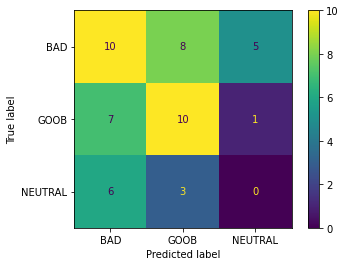

In [8]:
gnb = GaussianNB().fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))
# Scores
print('F1-Score: %.3f'%f1_score(y_test, y_pred, average="weighted"))
print('Precision: %.3f'%precision_score(y_test, y_pred, average="weighted"))
print('Recall: %.3f'%recall_score(y_test, y_pred, average="weighted"))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(conf_mat, display_labels=['BAD', 'GOOB', 'NEUTRAL'])
cmd.plot()

In [10]:
from sklearn.model_selection import GridSearchCV

In [11]:
param_dist={
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [14]:
grid=GridSearchCV(gnb,param_grid=param_dist,cv=5,verbose=1,n_jobs=-1)

In [15]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [16]:
grid.best_estimator_

GaussianNB(var_smoothing=4.328761281083062e-05)

In [17]:
grid.best_score_

0.6266666666666667

In [18]:
gnb = GaussianNB(var_smoothing=4.328761281083062e-05)

In [19]:
scoring = ['accuracy','f1_macro','precision_macro', 'recall_macro']
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scores = cross_validate(gnb, X, y, cv=5,scoring=scoring)
scores

{'fit_time': array([0.05000663, 0.04000092, 0.04999995, 0.05000114, 0.04999423]),
 'score_time': array([0.01999426, 0.02999854, 0.03000712, 0.0299983 , 0.02997732]),
 'test_accuracy': array([0.475, 0.525, 0.65 , 0.675, 0.55 ]),
 'test_f1_macro': array([0.41111111, 0.49882565, 0.54463364, 0.56339031, 0.4040404 ]),
 'test_precision_macro': array([0.45512821, 0.66666667, 0.75925926, 0.63623188, 0.37344029]),
 'test_recall_macro': array([0.41281513, 0.47636555, 0.55129552, 0.57457983, 0.44240196])}